<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons Licence" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">COMP3611 Eigenvectors and eigenvalues</span> by <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Marc de Kamps and University of Leeds</span> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.

# Eigenvectors and eigenvalues

## Objectives

At the end of this notebook, you should be able to
- explain the geometrical interpretation of eigen vectors and eigenvalue
- perform calculations of eigenvectors and eigenvalues  on $2 \times 2$ matrices by hand
- use numpy routines to calculate eigen vectors in higher dimensions
- explain why these calculations sometimes fail
- rember that *symmetric* matrices always have eigenvectos with real eigenvalues and orthogonal eigenvectors

## A geometric interpretation of matrix operations

Matrices operate on vectors and understanding matrix vector multiplication is a prerequiste for COMP3611. It is not quite correct but often helpful to depict the  vectors as points and a matrix as preforming a graphical operation
on sets of points.

**Example 1** : Rotation matrices

A rotation matrix in 2D is of the form:
$$
\mathcal{M} = \left( \begin{array}{cc} \cos \phi  &  - \sin \phi  \\ \sin \phi & \cos \phi \end{array} \right)
$$

If it operates on a vector of the form:
$$
\vec{v} = \left(  \begin{array}{x} x \\ y \end{array} \right),
$$

The result is a rotated vector:
$$
\mathcal{M} \vec{v} = \left( \begin{array}{c} x\cos \phi - y \sin \phi \\ x\sin \phi  + y\cos \phi  \end{array} \right)
$$

In Python it is easy to make this explicit visually.


First let's create some vectors and plot their values as points:



(-3.0, 3.0)

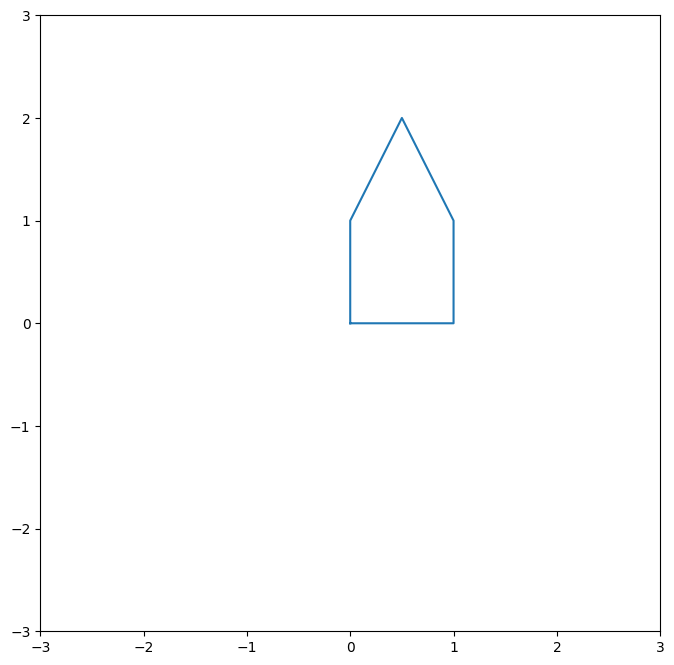

In [2]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,8)

x = [0., 1., 1, 0.5, 0., 0.]
y = [0., 0., 1, 2.,  1., 0.]

plt.plot(x,y)
plt.xlim([-3,3])
plt.ylim([-3,3])

Now let's apply a rotation matrix to this set of points:

(-3.0, 3.0)

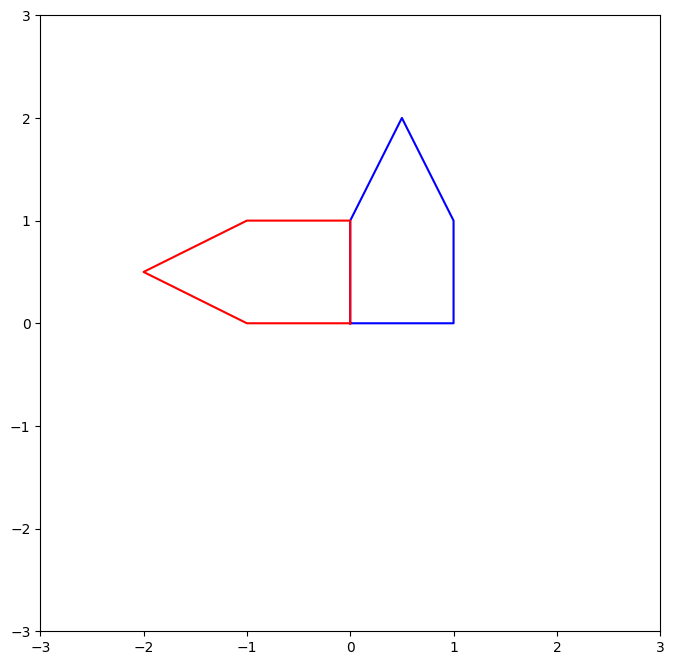

In [3]:
import numpy as np
phi = np.radians(90)

c= np.cos(phi)
s= np.sin(phi)

m = np.array([[c,-s],[s,c]])

origpoints = np.array([x,y])
rotpoints = m.dot(origpoints)
plt.plot(origpoints[0],origpoints[1],c='b')
plt.plot(rotpoints[0],rotpoints[1],c='r')

plt.xlim([-3,3])
plt.ylim([-3,3])

**Example 2** Inhomogeneous scaling

A matrix of the form:
$$
\mathcal{M} = \left( \begin{array}{c} k_1 & 0 \\ 0 & k_2 \end{array} \right),
$$
when applied to a vector scales the individual components of the vector:

(-3.0, 3.0)

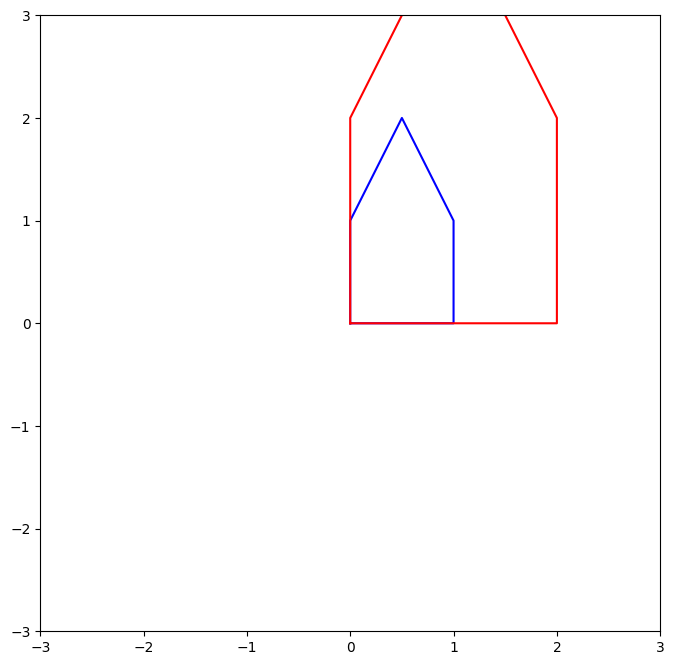

In [6]:
S=np.array([[2, 0],[0, 2]])
scaledpoints=S.dot(origpoints)
plt.plot(origpoints[0],origpoints[1],'b')
plt.plot(scaledpoints[0],scaledpoints[1],'r')
plt.xlim([-3,3])
plt.ylim([-3,3])

The last example is instructive. The matrix $\mathcal{S}$ generally changes the direction of any vector that it's applied to, but not the vectors. This is more clear if we draw a few vectors and their scaled counterparts. In this case we actuall draw them as vectors (so far we have drawn their tips; the distinction between a vector and a point is actually interesting but irrelevant for this notebook)

(-3.0, 3.0)

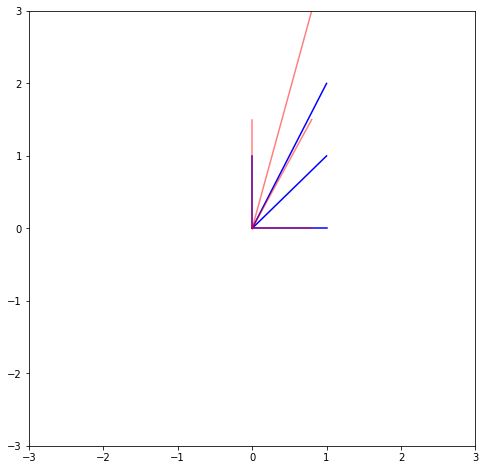

In [ ]:
v1 = [1,0]
v2 = [1,1]
v3 = [1,2]
v4 = [0,1]

origpoints = np.array([v1, v2, v3, v4]).T

x=origpoints[0]
y=origpoints[1]
for pt in zip(x,y):
    plt.plot([0,pt[0]],[0,pt[1]],'b')

scaledpoints=S.dot(origpoints)

xs=scaledpoints[0]
ys=scaledpoints[1]

for pt in zip(xs,ys):
    plt.plot([0,pt[0]],[0,pt[1]],'r',alpha=0.5)


plt.xlim([-3,3])
plt.ylim([-3,3])

You should verify by hand that the vectors $\left(  \begin{array}{x} 1 \\ 0 \end{array} \right)$,
and $\left(  \begin{array}{x} 0 \\ 1 \end{array} \right)$ do not have their direction changed by $\mathcal{S}$ and that they are the only vectors for which this is true.

**They are the eigenvectors of $\mathcal{S}$.**





**Example 3** Eigenvectors in an arbitrary direction

In the case of $\mathcal{S}$ the diagonal shape is a clear give away that vectors in the $x$ and $y$ directions are eigenvectors. Eigenvectors do't always align with the coordinate directions. We can for example construct a sequence of mappings in the following ways:

- Rotate counter clockwise by angle $\phi$.
- Apply matrix $\mathcal{S}$
- Rotate clockwise by angle $\phi$.

In this case the resulting matrix performs uniform scaling, not along in the $x, y$ directions but along directions that are rotated to the coordinate axes by an angle of $\phi$.

Let's pick an angle of 30 degrees as an example. The matrix we construct is then:
$$
\mathcal{T} = \left(  \begin{array}{cc} c  & s \\ -s & c \end{array} \right)\left( \begin{array}{c} k_1 & 0 \\ 0 & k_2 \end{array} \right)\left(  \begin{array}{cc} c  & -s \\ s & c \end{array} \right)
$$

In [ ]:
phi=np.radians(30)
c=np.cos(phi)
s=np.sin(phi)

r=np.array([[c, -s],[s, c]])
t=np.linalg.inv(r).dot(S.dot(r))

print(t)

[[0.975      0.30310889]
 [0.30310889 1.325     ]]


As a matrix, this is just a bag of numbers. We know from the way we constructed it that it implements a relatively simple operation, but there is nothing to suggest in the numbers themselves what they actually do. In order to find the eigenvectors we need to find which directions are left unchanged by the matrix.

To do this we write down a necessary condition for the matrix to have eigenvectors:
$$
\mathcal{M} \vec{v} = \lambda \vec{v}
$$

If this is true for a vector with direction $\vec{v}$, the $\vec{v}$ is am eigenvector. The value $\lambda$ is called the eigenvalue for that vector. In the example of non uniform scaling above, we saw that the vectors
$\left(  \begin{array}{x} 1 \\ 0 \end{array} \right)$,
and $\left(  \begin{array}{x} 0 \\ 1 \end{array} \right)$ are eigenvectors for eigenvalues 0.8 and 1.5.

For the matrix $\mathcal{T}$ we expect the eigenvalues to be the same, but the eigenvectors to be rotated. How can we check this? Here, we can rotate the horizontal and vertical axes by 30 degrees and see if their directions are unchanged.


In [ ]:
v=np.linalg.inv(r).dot([[1],[0]])
print(v)
print(t.dot(v))
print(t.dot(v)/0.8)


[[ 0.8660254]
 [-0.5      ]]
[[ 0.69282032]
 [-0.4       ]]
[[ 0.8660254]
 [-0.5      ]]


This little experiment shows that the clockwise rotated unit axis is an eigenvector.

Hopefully, this little experiment has demonstrated to you that linear maps can sometimes be understood as compositions of simple operations like scaling, rotations etc. In order to see if such compositions exist, it is helpful to know the eigenvectors, but it is not obvious what the eigenvectors are if someone produces just the numerical values of a matrix. We need a procedure to find the eigenvectors.

## Definition of eigenvectors

**The purpose of this section is to give you an idea of how eigenvalues can be found. In practice one uses
numpy. So the information in this section is background and will not be assessed. You should be able
to use numpy to find eigenvectors and values, so read on after this section.**

We wil consider the eigenvectors of a $2\times2$ matrix first. The condition for an eigenvector is
$$
\mathcal{M} \vec{v} = \lambda \vec{v}
$$
what does this mean? First, we know the value of $\mathcal{M}$ but both the eigenvector and eigenvalue are unknown. In components, this reads:
$$
\left( \begin{array}{cc} m_{11} & m_{12} \\ m_{21} & m_{22} \end{array} \right)
\left( \begin{array}{c} v_1 \\ v_2 \end{array} \right) = \lambda \left( \begin{array}{c} v_1 \\ v_2 \end{array} \right)
$$
or:
$$
\left( \begin{array}{cc} m_{11}-\lambda & m_{12} \\ m_{21} & m_{22} -\lambda \end{array} \right) \left( \begin{array}{c} v_1 \\ v_2 \end{array} \right) = 0,
$$
or more concisely:
$$
 \mathcal{M} - \lambda \mathbb{1} = 0,
$$
where
$$
\mathbb{1} = \left( \begin{array}{cc} 1 & 0 \\ 0 & 1 \end{array} \right)
$$
Now, we're not interested in eigenvectors that are $(0, 0)^T$ (this is not really a direction) so $v_1$ and $v_2$ can't be both 0, and there is something special about a matrix, in this case $\mathcal{M} - \lambda \mathbb{I}$ that maps a non-zero vector to 0.

### The definition of a determinant

Let's look at this more carefully. Let
$\mathcal{W} \vec{v} = 0$, for $\vec{v} \ne 0$. In components:
$$
\left( \begin{array}{cc} a & b \\ c & d \end{array} \right)
\left( \begin{array}{c} v_1 \\ v_2 \end{array} \right) = 0,
$$
where $a, b, c$ and $d$ are the components of $\mathcal{W}$.
This gives rise to two equations:
$$
 a v_1 + bv_2 = 0
$$
and
$$
c v_1 + dv_2 = 0
$$
Now assume v_1 \ne 0,
$$
 ad v_1 + d bv_2 = 0
$$
$$
bc v_1 + b dv_2 = 0
$$
Subtract the two equations and we find:
$$
(ad - bc) v_1 = 0,
$$
for $v_1 \ne 0$. This only possible when
$$
(ad - bc) = 0
$$

If $v_1 = 0$, then we agreed $v_2 \ne 0$ and you can derive the same result. So the requirement that
$$\mathcal{W} \vec{v} = 0$$, for $\vec{v} \ne 0$ cannot be fulfilled in general. This can happen only when
$$
ad - bc = 0
$$

The quantity $ad -bc$ is called a **determinant**. We write:
$$
\mbox{det}(\mathcal{W}) = ad -bc
$$
It is a number that is defined for every matrix, but only when
the determinant of $\mathcal{W} = 0$ we can have  $\mathcal{W} \vec{v} = 0$ for non-zero $\vec{v}$. Note that this
is a condition on the matrix, and the matrix alone.

### The determination of eigenvalues

The condition for finding eigenvectors is a solution to:

$$
\left( \begin{array}{cc} m_{11}-\lambda & m_{12} \\ m_{21} & m_{22} -\lambda \end{array} \right) \left( \begin{array}{c} v_1 \\ v_2 \end{array} \right) = 0,
$$

We now have seen that this is only possible when:
$$
\mbox{det}\left( \begin{array}{cc} m_{11}-\lambda & m_{12} \\ m_{21} & m_{22} -\lambda \end{array} \right) = 0
$$
Now, the is actually a second order polynomial in $\lambda$ as you should be able to check. You can solve this using the standard solution for finding roots of a quadratic equation. Give it a try, and you'll find:
$$
\lambda = \frac{\mbox{Tr}(\mathcal{M}) \pm \sqrt{\mbox{Tr}(\mathcal{M})^2 - 4 \mbox{det}(\mathcal{M})} }{2}
$$

where
$$
\mbox{Tr}(\mathcal{M}) = m_{11} + m_{22}
$$
and
$$
\mbox{det}(\mathcal{M}) = m_{11}m_{22} - m_{12}m_{21}
$$

This exercise shows that there are two, one or zero  real eigenvalues. When there are two real eigenvalues
there are also two eigenvectors.

### Symmetric matrices

There is an important result on eigenvectors for symmetric matrices: symmetric matrices always have two real eigenvalues (i.e. the equation in the previous section always has two solutions if the matrix is symmetric). Moreover, the eigenvectors are always perpendicular

### Higher dimensions

Most results we found for $2 \times 2$ matrices generalise to higher dimensions. It is possible to define a determinant for matrices of any dimensions (rank). Real symmetric matrices in $N$ dimensions always have $N$  eigenvectors, which are always perpendicular.

**Example 4:** Eigenvalues of a $2 \times 2$ matrix

In [ ]:
m=np.array([[1.,3.],[4.,5]])

tr  = m[0][0]+m[1][1]
det = m[0][0]*m[1][1]-m[1][0]*m[0][1]

print(tr)
print(det)

l1 = (tr + np.sqrt(tr*tr-4*det))/2
l2 = (tr - np.sqrt(tr*tr-4*det))/2
print('Eigenvalues:')
print(l1,l2)

6.0
-7.0
Eigenvalues:
7.0 -1.0


There is actually a convenient python routine to find eigenvalues, eigenvectors for square matrices of any dimension (if they exist).

In [ ]:
eig=np.linalg.eig(m)


**Exercise 1**:  Research how the eigenvalues and eigenvectors are represented in the result of *eig*. Discuss a way to validate that the eigenvectors are indeed eigenvectors that doesn't rely on *eig*.

**Exercise 2**: A rotation matrix doesn't have eigenvectors. Apply the numpy routine *eig* to a matrix representing a counterclockwise rotation of 30 degrees. What does it give you? How can you tell there are no eigenvectors? Or are there eigenvectors after all?

**Exercise 3**: Make up a symmetric $3 \times 3$ matrix. Find its egenvalues and eigenvectors.

## Spectral decomposition

Consider the vector $\left( \begin{array}{c} a \\ b \end{array} \right)$. We can form a symmetric matrix by using the *outer product* (see Reader for details):
$$
\left( \begin{array}{c} a \\ b \end{array} \right) \left( \begin{array}{c} a & b \end{array} \right) = \left(\begin{array}{c} a^2 & ab \\ ab & b^2 \end{array} \right)
$$
Since this is a symmetric matrix, we expect there to be eigenvectors. This is easy to check by formula above, or by doing the calculation directly. The eigenvalues are:
$$
\lambda_1 = 0
$$
and
$$
\lambda_2 = a^2 + b^2
$$
The corresponding eigenvectors are:
$$
\vec{v}_1 = \left( \begin{array}{c} a \\ b \end{array} \right)
$$

$$
\vec{v}_2 = \left( \begin{array}{c} 0 \\ 0 \end{array} \right)
$$
and
$$
\vec{v}_1 = \left( \begin{array}{c} a \\ b \end{array} \right)
$$

**Exercise 4:** Verify by explicit calculation that $\vec{v}_2 = \left( \begin{array}{c} a \\ b \end{array} \right)$ is an eigenvector.

In order to see the effect of an eigenvalue, it is best to *normalise* the vector
$ \left( \begin{array}{c} a \\ b \end{array} \right) $: construct the vector
$$
\vec{u} = \left( \begin{array}{c} \frac{a}{a^2 + b^2} \\ \frac{b}{a^2+b^2} \end{array} \right)
$$

**Exercise 5:** Construct the outer matrix: $\boldsymbol{u}\boldsymbol{u}^T$. (We switched to the often used convention that boldsymbols represent vectors). Verify that this matrix has eigenvalues 1 and 0. Conclude that for any realy number $\lambda$, $\lambda \boldsymbol{u}\boldsymbol{u}^T$ has eigenvalue $\lambda$.

**Exercise 6:** Construct a matrix that has the vector $\left( \begin{array}{c} 3 \\ 5 \end{array} \right)$ as
en eigenvector with eigenvalue 2.

### The spectral decomposition theorem in two dimensions
The spectral decomposition theorem states that if we take a unit vector
$$
\boldsymbol{u} = \left( \begin{array}{c} u_1 \\ u_2 \end{array} \right)
$$
and the unit vector perpendicular to it:
$$
\boldsymbol{u}_{\perp}  = \left( \begin{array}{c} -u_2 \\ u_1 \end{array} \right)
$$
that
$$
\lambda \boldsymbol{u}\boldsymbol{u}^T + \mu \boldsymbol{u}_{\perp} \boldsymbol{u}_{\perp}^T
$$
is a symmetric matrix with eigenvector $\vec{u}$ for eigenvalue $\lambda$ and with
eigenvector $\vec{u}_{perp}$ for eigenvalue $\mu$. Moreover, every real symmetric matrix is formed this way, i.e. every real symmetric matrix has two perpendicular eigenvectors with corresponding real eigenvalues.

**Example 5**: Symmetric matrix with eigenvectors $\frac{1}{\sqrt{11}}\left( \begin{array}{c} 1 \\ 10 \end{array} \right)$ and $\frac{1}{\sqrt{11}}\left( \begin{array}{c} 10 \\ -1 \end{array} \right)$,
with eigenvalues 2 and 7.

In [ ]:
u1=np.array([1,10])/np.sqrt(101.)
u2=np.array([-10,1])/np.sqrt(101.)

mat = 2.*np.outer(u1,u1) + 7.*np.outer(u2,u2)
print(mat)

[[ 6.95049505 -0.4950495 ]
 [-0.4950495   2.04950495]]


This is a symmetric matrix.

In [ ]:
eig=np.linalg.eig(mat)
print(eig)

(array([7., 2.]), array([[ 0.99503719,  0.09950372],
       [-0.09950372,  0.99503719]]))


With the predicted properties.